In [1]:
import numpy as np
import pandas as pd
import sys
import pickle

sys.path.append('../')
sys.path.append('../utils/')

from utils.models import Predictor
from utils.common_utils import *
from utils.data_prepare_utils import *
from utils.bayes_utils import *
from utils.process_finder import *

Using TensorFlow backend.


In [2]:
file_path = '../data/train_data/okaribe_train.csv'
weight_path = '../model/model_weights/okaribe_train_cls_high_acc.h5'

In [3]:
predictor = Predictor(file_path)
predictor.load_weight(weight_path)

/home/rewu/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 766 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 25154 validated image filenames belonging to 8 classes.


In [4]:
df_cls_res = get_classifier_result(file_path,predictor)



25154/25154 [==============================] - 291s 12ms/step


# Combine detect, Cls, original 

In [5]:
yolo_train_res_path = '/home/rewu/Documents/research/cv_tunnel/train-master/result_okaribe/detect_train.csv'

df_yolo_veh = pd.read_csv(yolo_train_res_path)
df_full_res_clean = pd.read_csv(file_path)

In [6]:
df_cls_obj_pred = combine_detect_cls(df_cls_res,df_yolo_veh)

In [7]:
df_cls_obj_pred.head()

,cls_pred,path,name,Excavator,Shovel,Jumbo,Loader,Mixer,Person,Skymaster,Dump_truck,Erector,Breaker,Mortar_truck,Shotcrete_equip,Erector_shotcrete_equip,Material_truck,blur
0,0,data/okaribe/data/C20190101-0000.jpg,C20190101-0000.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,data/okaribe/data/C20190101-0005.jpg,C20190101-0005.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,data/okaribe/data/C20190101-0010.jpg,C20190101-0010.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,data/okaribe/data/C20190101-0015.jpg,C20190101-0015.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,data/okaribe/data/C20190101-0020.jpg,C20190101-0020.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_tot = pd.merge(df_cls_obj_pred,df_full_res_clean,on='path',how='inner')

In [9]:
start_date = '2019-01-01 00:00:00'
end_date = '2019-04-10 00:00:00'
short_period_df= select_short_period_df(df_tot,start_date,end_date)



In [10]:
df_time,start_end_time_pairs = get_df_with_process(short_period_df)

../utils/process_finder.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  short_period_df['datetime'] = pd.DatetimeIndex(short_period_df['datetime'])
../utils/process_finder.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  short_period_df['in_process_time'] = 0
../utils/process_finder.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

# Bayesian Prediction

In [11]:
time_prob_df = pd.read_csv('../data/prior_knowledge/okaribe_time_cond_prob.csv')
veh_prob_df = pd.read_csv('../data/prior_knowledge/veh_info.csv')

with open('../data/prior_knowledge/vehicle_names.data', 'rb') as filehandle:
    veh_names = pickle.load(filehandle)
    
prior_knowledge = (time_prob_df,veh_prob_df,veh_names)

In [83]:
df_time,anom_scores = bayes_utils.update_combined_res(df_time,start_end_time_pairs,prior_knowledge)

remove wrong rest::  42 45
0.9661016949152542 0.9322033898305084 0.05084745762711865
remove wrong rest::  31 33
remove wrong rest::  97 100
0.8695652173913043 0.8869565217391304 0.4956521739130435
remove wrong rest::  39 42
remove wrong rest::  55 55
0.875 0.8392857142857143 0.03571428571428571
remove wrong rest::  73 76
0.9438202247191011 0.9325842696629213 0.449438202247191
remove wrong rest::  196 198
remove wrong rest::  200 203
remove wrong rest::  328 331
remove wrong rest::  336 339
remove wrong rest::  340 342
remove wrong rest::  345 347
0.7920792079207921 0.7871287128712872 0.7747524752475248
remove wrong rest::  53 55
0.8840579710144928 0.8260869565217391 0.2608695652173913
0.9795918367346939 0.9795918367346939 0.4897959183673469
0.9298245614035088 0.8771929824561403 0.17543859649122806
remove wrong rest::  84 86
0.9607843137254902 0.9215686274509803 0.23529411764705882
remove wrong rest::  56 56
0.9649122807017544 0.9649122807017544 0.017543859649122806
0.9157894736842105 0

remove wrong rest::  38 41
0.9027777777777778 0.9166666666666666 0.25
remove wrong rest::  34 36
0.9272727272727272 0.8727272727272727 0.0
remove wrong rest::  35 37
0.9625 0.925 0.0375
0.9807692307692307 0.9423076923076923 0.0
0.963855421686747 0.9518072289156626 0.1566265060240964
remove wrong rest::  0 1
remove wrong rest::  47 49
0.94 0.88 0.0
0.9761904761904762 0.9761904761904762 0.07142857142857142
remove wrong rest::  59 61
0.9324324324324325 0.9054054054054054 0.4864864864864865
0.9574468085106383 0.9361702127659575 0.02127659574468085
0.9166666666666666 0.9166666666666666 0.35
remove wrong rest::  32 34
0.9824561403508771 0.9298245614035088 0.0
remove wrong rest::  33 35
0.975609756097561 0.9512195121951219 0.06097560975609756
0.9361702127659575 0.9290780141843972 0.624113475177305
0.9886524822695035 0.9886524822695035 0.8539007092198582
remove wrong rest::  84 85
remove wrong rest::  90 91
0.9798657718120806 0.9530201342281879 0.4697986577181208
remove wrong rest::  48 51
0.9

0.17647058823529413
0.9248618784530387
0.19696969696969696
0.0
0.3972602739726027
0.0
0.4897959183673469
0.05555555555555555
0.038461538461538464
0.46153846153846156


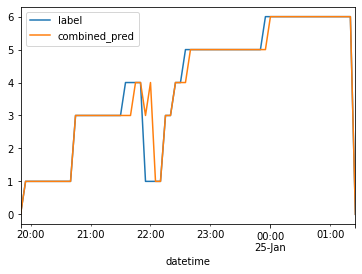

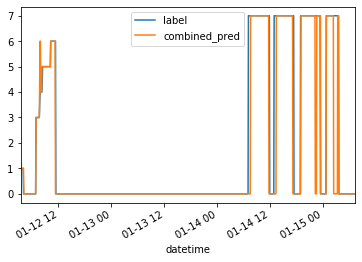

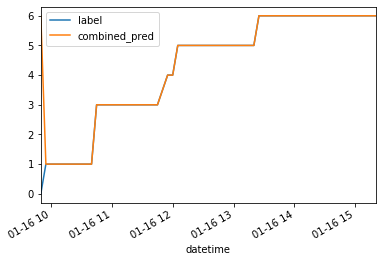

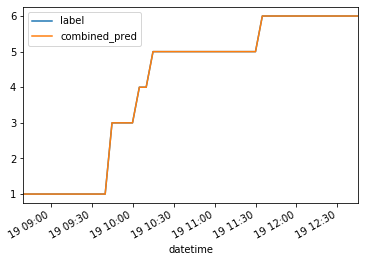

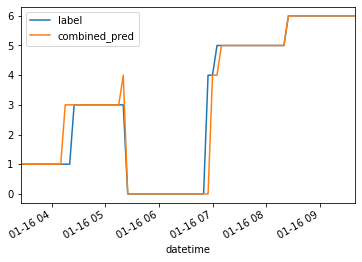

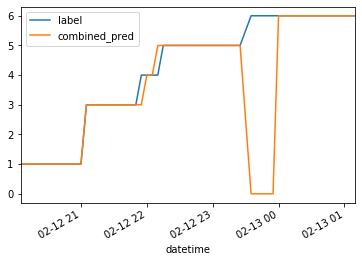

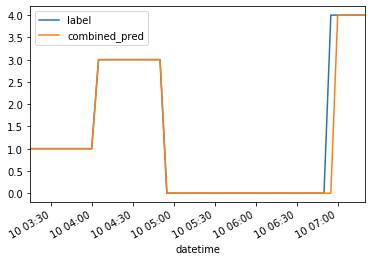

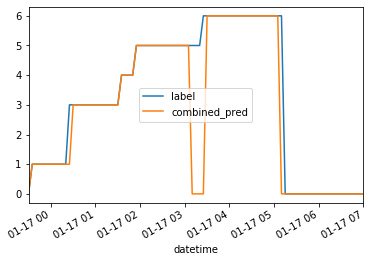

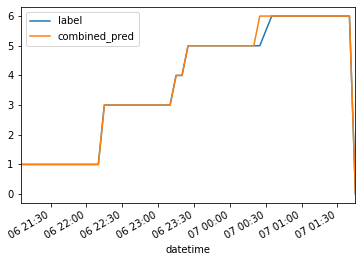

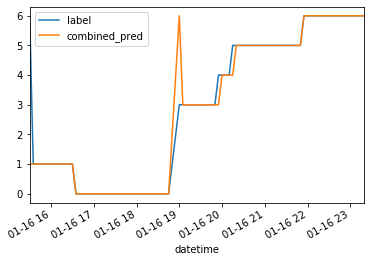

In [88]:
for i in np.random.randint(100,size=10):
    start_date,end_date = start_end_time_pairs[i]
    process_df= select_short_period_df(df_time,start_date,end_date)


    print (anom_scores[i])
    process_df.plot(x="datetime",y=["label",'combined_pred'])